In [314]:
#Import required libraries
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
from shutil import copyfile


# Gather the Data

### User Input

In [232]:
#Which dataset is to be used for analysis?
dataset = 'fwwc19'

### End User Input

###### In order to use this for future projects I have created a variable for my global dataset location and a variable for dataset to easily access the data I want

In [233]:
#My datasets are saved in a global folder called "datasets"
datasets_location = '../datasets'

#Get a list of the .csv files available for the selected dataset 
data_files = [f for f in os.listdir(os.path.join(datasets_location,dataset)) if f.endswith('.csv')]

#Print the .csv file names, as if there is more than one it is useful to know that merge/join/concat may need to be used
print("Data files found:\n",data_files)

#Check if file exists in project folder, if not, copy it here
if not os.path.exists(str(data_files[0])):
    copyfile(os.path.join(datasets_location,dataset,data_files[0]), os.path.join(os.getcwd(),data_files[0]))

#Create the dataframe from the imported data
df = pd.read_csv(data_files[0])

Data files found:
 ['Womens_World_Cup_2019.csv']


In [234]:
#In order to inspect what data is available, I want to make sure to be able to visualise all the columns
pd.set_option('display.max_columns', None)

df.head()

,Year,Team 1,Score 1,Team 2,Score 2,Round,Date,Penalty Kicks,Penalty Score 1,Penalty Score 2,Player of the Match 1,Player of the Match 2,Total Shots 1,Total Shots 2,Shots on Goal 1,Shots on Goal 2,Shots Blocked 1,Shots Blocked 2,Fouls 1,Fouls 2,Corner Kicks 1,Corner Kicks 2,Possession 1,Possession 2
0,2019,FRA,4,KOR,0,Group,7-Jun,0,NaN,NaN,1,0,21,4,8,1,5,1,11,11,13,1,60,40
1,2019,GER,1,CHN,0,Group,8-Jun,0,NaN,NaN,1,0,18,4,5,1,5,1,7,19,8,3,62,38
2,2019,ESP,3,RSA,1,Group,8-Jun,0,NaN,NaN,1,0,25,4,12,2,8,2,12,13,5,2,72,28
3,2019,NOR,3,NGA,0,Group,8-Jun,0,NaN,NaN,1,0,10,9,4,1,2,2,5,10,5,5,57,43
4,2019,AUS,1,ITA,2,Group,9-Jun,0,NaN,NaN,0,1,17,5,7,3,3,1,20,19,6,3,57,43


In [235]:
#This is a relatively small dataset, but more columns would be more difficult to inspect
#It is possible to inspect the columns in the dataset in a more "textual"/truncated way
df.columns

Index(['Year', 'Team 1', 'Score 1', 'Team 2', 'Score 2', 'Round', 'Date',
       'Penalty Kicks', 'Penalty Score 1', 'Penalty Score 2',
       'Player of the Match 1', 'Player of the Match 2', 'Total Shots 1',
       'Total Shots 2', 'Shots on Goal 1', 'Shots on Goal 2',
       'Shots Blocked 1', 'Shots Blocked 2', 'Fouls 1', 'Fouls 2',
       'Corner Kicks 1', 'Corner Kicks 2', 'Possession 1', 'Possession 2'],
      dtype='object')

# Assess The Data

In [236]:
#Check if there are any missing data points
null_series = df.isnull().sum(axis = 0)
print(null_series[null_series > 0])

Penalty Score 1    51
Penalty Score 2    51
dtype: int64


In [237]:
#Convert NaN to 0 
df.fillna(0, inplace=True)
df.isnull().sum(axis = 0)

Year                     0
Team 1                   0
Score 1                  0
Team 2                   0
Score 2                  0
Round                    0
Date                     0
Penalty Kicks            0
Penalty Score 1          0
Penalty Score 2          0
Player of the Match 1    0
Player of the Match 2    0
Total Shots 1            0
Total Shots 2            0
Shots on Goal 1          0
Shots on Goal 2          0
Shots Blocked 1          0
Shots Blocked 2          0
Fouls 1                  0
Fouls 2                  0
Corner Kicks 1           0
Corner Kicks 2           0
Possession 1             0
Possession 2             0
dtype: int64

In [238]:
#Show some info about the dataset
df.describe()

,Year,Score 1,Score 2,Penalty Kicks,Penalty Score 1,Penalty Score 2,Player of the Match 1,Player of the Match 2,Total Shots 1,Total Shots 2,Shots on Goal 1,Shots on Goal 2,Shots Blocked 1,Shots Blocked 2,Fouls 1,Fouls 2,Corner Kicks 1,Corner Kicks 2,Possession 1,Possession 2
count,52.0,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,2019.0,1.653846,1.153846,0.019231,0.076923,0.019231,0.557692,0.442308,13.634615,11.557692,4.961538,3.884615,3.192308,2.673077,9.846154,10.173077,4.826923,4.365385,51.134615,48.134615
std,0.0,2.018392,1.194507,0.138675,0.554700,0.138675,0.501506,0.501506,7.928674,6.601882,3.709878,2.609589,2.401294,2.083748,3.852092,4.626103,3.750666,2.897117,12.120359,10.219222
min,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,4.000000,25.000000
25%,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,7.500000,2.750000,2.000000,1.000000,1.000000,7.000000,7.000000,2.000000,2.000000,44.500000,40.750000
50%,2019.0,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,12.000000,11.500000,4.000000,3.000000,3.000000,2.000000,10.000000,9.000000,4.000000,4.000000,50.500000,49.500000
75%,2019.0,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,18.000000,15.250000,6.250000,6.000000,4.250000,4.000000,12.250000,12.000000,7.000000,6.250000,59.250000,55.500000
max,2019.0,13.000000,5.000000,1.000000,4.000000,1.000000,1.000000,1.000000,39.000000,29.000000,21.000000,12.000000,9.000000,8.000000,20.000000,24.000000,15.000000,12.000000,75.000000,69.000000


In [239]:
#Investigate the data types available as it could be useful to filter some out
#It also is useful to know the categorical types if it is desired to encode categorical data later
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 24 columns):
Year                     52 non-null int64
Team 1                   52 non-null object
Score 1                  52 non-null int64
Team 2                   52 non-null object
Score 2                  52 non-null int64
Round                    52 non-null object
Date                     52 non-null object
Penalty Kicks            52 non-null int64
Penalty Score 1          52 non-null float64
Penalty Score 2          52 non-null float64
Player of the Match 1    52 non-null int64
Player of the Match 2    52 non-null int64
Total Shots 1            52 non-null int64
Total Shots 2            52 non-null int64
Shots on Goal 1          52 non-null int64
Shots on Goal 2          52 non-null int64
Shots Blocked 1          52 non-null int64
Shots Blocked 2          52 non-null int64
Fouls 1                  52 non-null int64
Fouls 2                  52 non-null int64
Corner Kicks 1           52 n

In [240]:
#Save the categorical columns only
cat_cols_df = df.select_dtypes(['object'])
cat_cols_df.head()

,Team 1,Team 2,Round,Date
0,FRA,KOR,Group,7-Jun
1,GER,CHN,Group,8-Jun
2,ESP,RSA,Group,8-Jun
3,NOR,NGA,Group,8-Jun
4,AUS,ITA,Group,9-Jun


In [241]:
#Save the numerical columns only
num_cols_df = df.select_dtypes(include=np.number)
num_cols_df.head()

,Year,Score 1,Score 2,Penalty Kicks,Penalty Score 1,Penalty Score 2,Player of the Match 1,Player of the Match 2,Total Shots 1,Total Shots 2,Shots on Goal 1,Shots on Goal 2,Shots Blocked 1,Shots Blocked 2,Fouls 1,Fouls 2,Corner Kicks 1,Corner Kicks 2,Possession 1,Possession 2
0,2019,4,0,0,0.0,0.0,1,0,21,4,8,1,5,1,11,11,13,1,60,40
1,2019,1,0,0,0.0,0.0,1,0,18,4,5,1,5,1,7,19,8,3,62,38
2,2019,3,1,0,0.0,0.0,1,0,25,4,12,2,8,2,12,13,5,2,72,28
3,2019,3,0,0,0.0,0.0,1,0,10,9,4,1,2,2,5,10,5,5,57,43
4,2019,1,2,0,0.0,0.0,0,1,17,5,7,3,3,1,20,19,6,3,57,43


In [242]:
#Some useful things to store
num_rows = df.shape[0]
num_columns = df.shape[1]
print('Rows = {}'.format(num_rows))
print('Columns = {}'.format(num_columns))

#Note that I could use f-strings here but I am running python3.5 not python3.6 or higher
# print(f"Columns = {num_columns}")

Rows = 52
Columns = 24


# Clean Data

###### One thing I would like to do is remove the spaces from the titles to make things a little cleaner

In [243]:
#First, to keep things consistent with PEP8 snake case for variables, convert the column names to lowercase
df.columns = map(str.lower, df.columns)

#Lambda function to replace all the spaces with underscores (This is DRY, otherwise individually changing would be WET)
replace_spaces = lambda x: x.replace(' ', '_')
replace_spaces.__doc__ = """Replaces white space ' ' with underscore '_'."""
help(replace_spaces)

#Reassign df using rename and applying the replace_spaces function to columns
df = df.rename(columns=replace_spaces)

#Print the column names to check everything worked ok
df.columns


Help on function <lambda> in module __main__:

<lambda> lambda x
    Replaces white space ' ' with underscore '_'.



Index(['year', 'team_1', 'score_1', 'team_2', 'score_2', 'round', 'date',
       'penalty_kicks', 'penalty_score_1', 'penalty_score_2',
       'player_of_the_match_1', 'player_of_the_match_2', 'total_shots_1',
       'total_shots_2', 'shots_on_goal_1', 'shots_on_goal_2',
       'shots_blocked_1', 'shots_blocked_2', 'fouls_1', 'fouls_2',
       'corner_kicks_1', 'corner_kicks_2', 'possession_1', 'possession_2'],
      dtype='object')

# Q1: What was the average number of goals scored by each team

In [244]:
#Let's say I want to see all the data for a specific team..

#list specifiying team of interest
team = ['ENG']

#slice the dataframe to show only the rows where the column 'Team 1' or 'Team 2' value is in the specified string list 'team'
df.loc[df['team_1'].isin(team) | df['team_2'].isin(team)]

,year,team_1,score_1,team_2,score_2,round,date,penalty_kicks,penalty_score_1,penalty_score_2,player_of_the_match_1,player_of_the_match_2,total_shots_1,total_shots_2,shots_on_goal_1,shots_on_goal_2,shots_blocked_1,shots_blocked_2,fouls_1,fouls_2,corner_kicks_1,corner_kicks_2,possession_1,possession_2
6,2019,ENG,2,SCO,1,Group,9-Jun,0,0.0,0.0,1,0,14,8,6,4,2,2,8,8,9,2,56,44
19,2019,ENG,1,ARG,0,Group,14-Jun,0,0.0,0.0,0,1,19,3,7,2,4,0,10,10,7,0,64,36
30,2019,JPN,0,ENG,2,Group,19-Jun,0,0.0,0.0,0,1,16,14,5,6,1,4,4,11,4,6,49,51
38,2019,ENG,3,CMR,0,Round of 16,23-Jun,0,0.0,0.0,1,0,7,8,3,2,1,1,4,11,4,2,63,37
44,2019,NOR,0,ENG,3,Quarter Final,27-Jun,0,0.0,0.0,0,1,11,17,3,7,5,4,11,12,2,5,50,50
48,2019,ENG,1,USA,2,Semi Final,2-Jul,0,0.0,0.0,0,1,7,10,4,4,1,1,12,9,2,2,53,47
50,2019,ENG,1,SWE,2,Third Place Playoff,6-Jul,0,0.0,0.0,0,1,13,9,4,8,4,0,11,11,4,2,54,46


In [245]:
#Since the team appears in both 'team_1' and 'team_2' and their scores in 'score_1' and 'score_2' accordingly, 
##we need to concatenate all this info into a single 'team' and 'score' column
df_team = pd.concat([
    df.loc[df.team_1.isin(team), ['team_1', 'score_1']].rename(columns={'team_1': 'team', 'score_1': 'score'}),
    df.loc[df.team_2.isin(team), ['team_2', 'score_2']].rename(columns={'team_2': 'team', 'score_2': 'score'})
    ],
    ignore_index=True
    )

df_team.mean(axis = 0) 

score    1.857143
dtype: float64

In [246]:
#Now I want to do this for ALL the teams, not just one

#First, get a list of unique teams in both 'team_1' and 'team_2' columns
teams_unique = df.team_1.unique()
teams_unique = teams_unique.tolist()
team_2_unique = df.team_2.unique()

#Check that getting the list of unique teams from only one 'team' column is valid
if sorted(teams_unique) == sorted(team_2_unique):
    print("\nteam_1 and team_2 unique contents are the same")
    print("Teams in the 2019 FFWC:", *sorted(teams_unique), sep = "\n")
else:
    print("\nteam_1 and team_2 unique contents are NOT the same - consider concatenating and removing duplicates")


team_1 and team_2 unique contents are the same
Teams in the 2019 FFWC:
ARG
AUS
BRA
CAN
CHI
CHN
CMR
ENG
ESP
FRA
GER
ITA
JAM
JPN
KOR
NED
NGA
NOR
NZL
RSA
SCO
SWE
THA
USA


{'SWE': 1.7, 'AUS': 2.2, 'NGA': 0.5, 'CAN': 1.0, 'THA': 0.3, 'NED': 1.6, 'CHN': 0.2, 'ENG': 1.9, 'JPN': 0.8, 'GER': 2.0, 'KOR': 0.3, 'CMR': 0.8, 'BRA': 1.8, 'NZL': 0.3, 'USA': 3.7, 'ITA': 1.8, 'RSA': 0.3, 'SCO': 1.7, 'FRA': 2.0, 'ESP': 1.0, 'JAM': 0.3, 'ARG': 1.0, 'NOR': 1.4, 'CHI': 0.7}


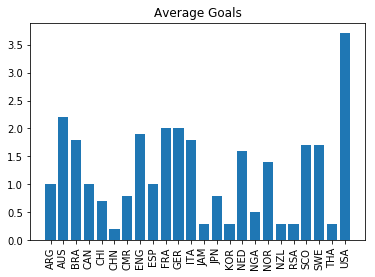

In [247]:
#Now take what was done before, and create a function



def team_average(team_list):
    """Returns and plots the average number of goals scored for all teams in team_list.

    Args:
    team_list: list. The list of teams to perform the calculation on.

    Returns:
    team_score_mean: Dictionary of all the teams and their corresponding average score.

    """
    team_score_mean = {}

    for team in team_list:
        #1-Slice the dataframe to show only the rows where the column 'Team 1' or 'Team 2' value is in the specified string list 'team'
        df.loc[df['team_1'].str.contains(team) | df['team_2'].str.contains(team)]

        #2-Concatenate all this info into a single 'team' and 'score' column
        df_team = pd.concat([
        df.loc[df.team_1.str.contains(team), ['team_1', 'score_1']].rename(columns={'team_1': 'team', 'score_1': 'score'}),
        df.loc[df.team_2.str.contains(team), ['team_2', 'score_2']].rename(columns={'team_2': 'team', 'score_2': 'score'})
        ],
        ignore_index=True
        )
        
        #3-Calculate the mean score
        score_column = df_team.loc[: , "score"]
        df_team['score_mean'] = score_column.mean(axis=0)
        df_team = df_team.round(1)
        score_mean_column = df_team["score_mean"]
        score_mean_column.max()
        team_score_mean[team] = score_mean_column.max()
    print(team_score_mean)
    
    #4-Plot the mean score for each team
    plt.bar(team_score_mean.keys(), team_score_mean.values())
    plt.title("Average Goals")
    plt.xticks(rotation=90)    


team_average(teams_unique)



# Q2: Is there a correlation between winning a match and a player of the winning team being named as Player of the Match (POM)?

In [303]:
df.head()

,year,team_1,score_1,team_2,score_2,round,date,penalty_kicks,penalty_score_1,penalty_score_2,player_of_the_match_1,player_of_the_match_2,total_shots_1,total_shots_2,shots_on_goal_1,shots_on_goal_2,shots_blocked_1,shots_blocked_2,fouls_1,fouls_2,corner_kicks_1,corner_kicks_2,possession_1,possession_2
0,2019,FRA,4,KOR,0,Group,7-Jun,0,0.0,0.0,1,0,21,4,8,1,5,1,11,11,13,1,60,40
1,2019,GER,1,CHN,0,Group,8-Jun,0,0.0,0.0,1,0,18,4,5,1,5,1,7,19,8,3,62,38
2,2019,ESP,3,RSA,1,Group,8-Jun,0,0.0,0.0,1,0,25,4,12,2,8,2,12,13,5,2,72,28
3,2019,NOR,3,NGA,0,Group,8-Jun,0,0.0,0.0,1,0,10,9,4,1,2,2,5,10,5,5,57,43
4,2019,AUS,1,ITA,2,Group,9-Jun,0,0.0,0.0,0,1,17,5,7,3,3,1,20,19,6,3,57,43


/usr/local/anaconda3/envs/p3/lib/python3.5/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/anaconda3/envs/p3/lib/python3.5/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


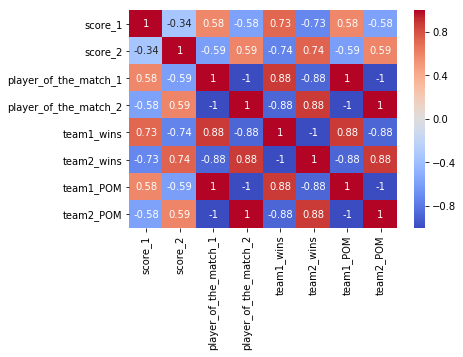

team1_wins    28.0
team2_wins    20.0
team1_POM     29.0
team2_POM     23.0
dtype: float64

In [321]:
def correlate_pom_score():
    """Plots the correlation between a team winning and a player from that team winning POM.
    """

    corr_columns = ['team_1', 'team_2', 'score_1', 'score_2', 'player_of_the_match_1', 'player_of_the_match_2']
    df_corr = df[corr_columns]
    
    df_corr.loc[df_corr.score_1 > df_corr.score_2, 'team1_wins'] = 1
    df_corr.loc[df_corr.score_1 > df_corr.score_2, 'team2_wins'] = 0
    df_corr.loc[df_corr.score_2 > df_corr.score_1, 'team2_wins'] = 1
    df_corr.loc[df_corr.score_2 > df_corr.score_1, 'team1_wins'] = 0
    df_corr.loc[df_corr.player_of_the_match_1 > df_corr.player_of_the_match_2, 'team1_POM'] = 1
    df_corr.loc[df_corr.player_of_the_match_1 > df_corr.player_of_the_match_2, 'team2_POM'] = 0
    df_corr.loc[df_corr.player_of_the_match_2 > df_corr.player_of_the_match_1, 'team2_POM'] = 1
    df_corr.loc[df_corr.player_of_the_match_2 > df_corr.player_of_the_match_1, 'team1_POM'] = 0

    df_corr.isnull().sum(axis = 0)
#     df_corr.drop(['team_1', 'team_2', 'score_1', 'score_2', 'player_of_the_match_1', 'player_of_the_match_2'], axis=1, inplace=True)

    corrMatrix = df_corr.corr(method='kendall')
    sn.heatmap(corrMatrix, annot=True, cmap="coolwarm")
    plt.show()

correlate_pom_score()

df_corr.sum(axis=0)



In [ ]:
# corr = drop_sal_df.corr()
# corr.style.background_gradient(cmap='coolwarm')

# import seaborn as sn

# corrMatrix = df.corr()
# sn.heatmap(corrMatrix, annot=True)
# plt.show()